In [6]:
import pandas as pd

data_lst = [{'a': 1, 'b': 2, 'c':3}, {'a': 4, 'b':5, 'c':6, 'd':7}]

df = pd.DataFrame(data_lst)

df


,a,b,c,d
0,1,2,3,NaN
1,4,5,6,7.0


In [7]:
datalist = [{1: 'A'}, {2: 'B'}, {3: 'D'}]
df2 = pd.DataFrame(datalist)
df2

,1,2,3
0,A,NaN,NaN
1,NaN,B,NaN
2,NaN,NaN,D


In [8]:
data_vals = [[1,2,3], [1,2,3]]
data_cols = ['a','b','c']

df3 = pd.DataFrame(data = data_vals, columns = data_cols)  # number of values has to be consistent with 
df3                                                        # the number of columns

,a,b,c
0,1,2,3
1,1,2,3


In [9]:
data_vals2 = [[1,2], [1,2,3]]
data_cols2 = ['a','b','c']

df4 = pd.DataFrame(data = data_vals2, columns = data_cols2) # missinbg values will be added as NaN

df4
            

,a,b,c
0,1,2,NaN
1,1,2,3.0


In [10]:
df5 = pd.read_csv('winequality-red.csv',delimiter = ';')  # read a csv with a given delimiter
df5.head()

df5.shape     # shows a number of cols and rows in df
df5.columns   # gives names of columns
df5.info      # look at the datatype for each column
df5.describe()# fast statistics of df
df5.head(5)   # shows the first n lines
df5.tail(5)   # shows the last n lines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
df5['fixed acidity']     # grab some columns like string
df[['chlorides', 'volatile acidity']] # choose multiple columns
df5.density.head()       # grab some column method-like

KeyError: "['chlorides' 'volatile acidity'] not in index"

In [12]:
df5 = df5.copy()      # create a copy
cols = df5.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]  # replace spaces in col names with underscore
df5.columns = cols                              # replace cols of df with cols with new names
df5.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df5[0:5]     # slice over df
df5[::-1]
df5.loc[1:5,['chlorides', 'fixed_acidity']] # slive over rows of given col names
df5.iloc[1:5, [2,4]]          # index location for cols and rows

,citric_acid,chlorides
1,0.00,0.098
2,0.04,0.092
3,0.56,0.075
4,0.00,0.076


In [14]:
df5.density > 1       # check values in a given column

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
1583    False
1584    False
1585    False
1586    False
1587    False
1588    False
1589    False
1590    False
1591    False
1592    False
1593    False
1594    False
1595    False
1596    False
1597    False
1598    False
Name: density, Length: 1599, dtype: bool

In [15]:
df5[df5['chlorides'] <= 0.08].head()   # mask values under 0.08 in the column 'chlorides'
df5[(df5['chlorides'] >= 0.04) & (df5['chlorides'] < 0.08)].head() # multiple mask conditions
df5.query('chlorides >= 0.04 and chlorides <= 0.08 and pH > 3.5 and pH < 4.00').head() # writing multiple 
                                                                                # conditions in a query

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
94,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,4


In [16]:
df5['chlorides'].unique   # gives unique elements in a given column
df_groupby = df5.groupby('quality')  # grouping by a col name

In [17]:
df_groupby.sum()          # sum of grouped elements by quality column
df5.groupby('quality').count()['fixed_acidity']
df5.groupby(['pH', 'quality']).count()['chlorides']
df5.sort_values(['quality' ,'density'], ascending=False).head()  # sort values in a specific way

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8


In [18]:
df5.rename(columns={'total sulfur dioxide': 'total_sulfur_dioxide', 
                   'free sulfur dioxide': 'free_sulfur_dioxide' }, inplace=True) # rename some col names

In [19]:
test = df5.eval('non_free_sulfur2 = total_sulfur_dioxide - free_sulfur_dioxide') # evaluates the statement in bracket

In [20]:
#test.drop('pH', inplace = True, axis=1)   # remove column 'pH'
df5.fillna(-1, inplace=True)               # fill NaN's 

In [21]:
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')

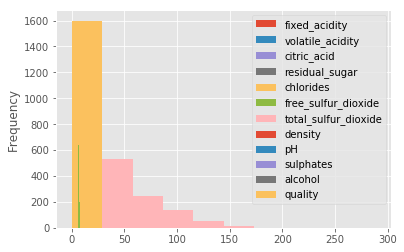

In [22]:
df5.plot(kind='hist')
df5['quality'].plot(kind='hist')   # plot in general style
plt.plot(df5['chlorides'])         # pot in matplotlib

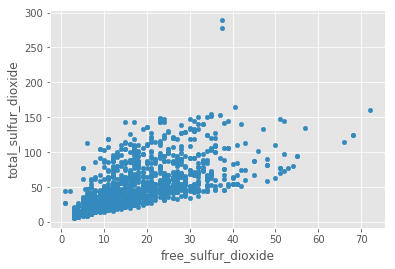

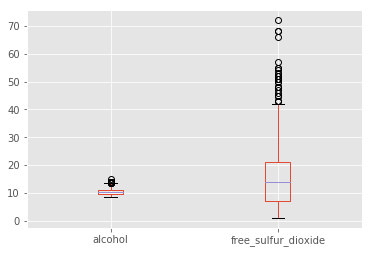

In [32]:
df5.plot(kind='scatter', x='free_sulfur_dioxide', y='total_sulfur_dioxide')  # scatter plot 
df5[['alcohol','free_sulfur_dioxide']].plot(kind='box')       # create a boxplot

In [27]:
df5.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
